In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer


In [84]:
df = pd.read_csv('spambase.data', header=None)
print(df.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


Detalhes: algumas colunas, a exemplo 55 e 56, possuem valores em um range desproporcional ao range das demais colunas. Corrigiremos este problema utilizando uma normalização dos valores 

In [85]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Podemos observar que temos um range de valores desproporcional através das colunas. A menor média de uma coluna é 0.005 enquanto que a maior é 283. Isso pode fazer com que a influência de determinada coluna seja muito maior que outras.

In [86]:
(df.describe().iloc[1].min()), (df.describe().iloc[1].max())

(0.005444468593783961, 283.28928493805694)

Divisão dos dados em Features e Target

In [87]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [88]:
X

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


Normalização

In [89]:
normalizer = Normalizer()
X = normalizer.fit_transform(X)
X = pd.DataFrame(X)


In [90]:
X

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.000000,0.002248,0.002248,0.0,0.001124,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.002733,0.000000,0.000000,0.013195,0.214296,0.976627
1,0.000203,0.000271,0.000484,0.0,0.000136,0.000271,0.000203,0.000068,0.000000,0.000910,...,0.0,0.000000,0.000128,0.0,0.000360,0.000174,0.000046,0.004951,0.097776,0.995188
2,0.000026,0.000000,0.000307,0.0,0.000532,0.000082,0.000082,0.000052,0.000277,0.000108,...,0.0,0.000004,0.000062,0.0,0.000119,0.000080,0.000004,0.004251,0.209911,0.977710
3,0.000000,0.000000,0.000000,0.0,0.003227,0.000000,0.001588,0.003227,0.001588,0.003227,...,0.0,0.000000,0.000702,0.0,0.000702,0.000000,0.000000,0.018119,0.204911,0.978452
4,0.000000,0.000000,0.000000,0.0,0.003227,0.000000,0.001588,0.003227,0.001588,0.003227,...,0.0,0.000000,0.000692,0.0,0.000692,0.000000,0.000000,0.018119,0.204911,0.978452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.003519,0.000000,0.007039,0.0,0.000000,0.003519,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.002634,0.0,0.000000,0.000000,0.000000,0.012965,0.034058,0.999024
4597,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.021954,0.000000,0.000000,0.096708,0.248768,0.870687
4598,0.002538,0.000000,0.002538,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000863,0.006075,0.0,0.000000,0.000000,0.000000,0.011878,0.050763,0.998331
4599,0.012276,0.000000,0.000000,0.0,0.004092,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000729,0.0,0.000000,0.000000,0.000000,0.014667,0.063937,0.997423


Divisão em Treinamento, Validação e Teste

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42, stratify=y_train)


Preparação dos valores dos hiperparâmetros a serem testados

In [92]:
scoring = ['precision', 'recall', 'f1']
n_values = np.arange(1,10)
weights = ['uniform', 'distance']
param_grid = {'n_neighbors': n_values, 'weights': weights}
knn = KNeighborsClassifier(metric="euclidean")


Busca por hiperparâmetros ideais

In [93]:
grid_search = GridSearchCV(knn,param_grid=param_grid, scoring=scoring, refit='f1')
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             refit='f1', scoring=['precision', 'recall', 'f1'])

Melhores parâmetros encontrados

In [94]:
knn = grid_search.best_estimator_
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=8, weights='distance')

In [95]:
print("Acurácia no conjunto de validação:")
knn.score(X_val, y_val)

Acurácia no conjunto de validação:


0.8488612836438924

In [96]:
scores = cross_validate(knn, X_val, y_val, scoring=scoring)
print("Desempenho do melhor modelo no conjunto de validação para as métricas escolhidas")
print("Precision:", scores["test_precision"].mean(),"\nRecall:", scores["test_recall"].mean(),"\nf1-score:", scores["test_f1"].mean())

Desempenho do melhor modelo no conjunto de validação para as métricas escolhidas
Precision: 0.666790324246917 
Recall: 0.8767259056732742 
f1-score: 0.7570709408636095


Preparação de dados para plotagem das métricas de avaliação de acordo com o tamanho das partições de treinamento e teste

In [97]:
test_size = np.arange(0.95, 0.049, -0.05)
lista_precision, lista_recall, lista_f1, lista_acc = [],[],[],[]

for div in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=div, random_state=42, stratify=y)
    knn.fit(X_train, y_train)
    scores = cross_validate(knn, X_test, y_test, scoring=scoring)
    lista_acc.append(knn.score(X_test,y_test))
    lista_precision.append(scores['test_precision'].mean())
    lista_recall.append(scores['test_recall'].mean())
    lista_f1.append(scores['test_f1'].mean())

print("Accuracy:", lista_acc)
print('Precision:', lista_precision)
print('Recall:', lista_recall)
print('F1:', lista_f1)

Accuracy: [0.7394188972775109, 0.7659985510746197, 0.7747379186908719, 0.7916327085031242, 0.8003477252970154, 0.8109282831418814, 0.8124373119358074, 0.8152843172763492, 0.8194389569340181, 0.8252933507170795, 0.8227909222597779, 0.8250950570342205, 0.8286778398510242, 0.832729905865315, 0.843614248479583, 0.8610206297502715, 0.874095513748191, 0.8915401301518439, 0.8917748917748918]
Precision: [0.7659360102759691, 0.7541218316769751, 0.7559929135868406, 0.7472886830358373, 0.747782863112346, 0.7357110475409453, 0.7382087139634247, 0.7401464895540103, 0.7302254864546921, 0.7286804857420972, 0.7058751541379287, 0.7189153634985581, 0.7126792709579837, 0.6926246774399719, 0.6794190016272454, 0.6755262594548309, 0.6588243206887274, 0.6199008539586047, 0.6224747474747474]
Recall: [0.9076710481968318, 0.9037954259769986, 0.9058987937628714, 0.9013793103448275, 0.9066176470588235, 0.90073760542778, 0.8905661738189685, 0.8841711410814697, 0.8645577889447237, 0.8522372654969341, 0.866444710459

Lista para avaliação conjunta das métricas

In [98]:
lista_media_geral = [(lista_acc[i]+lista_f1[i]+lista_precision[i]+lista_recall[i])/4 for i in range(len(lista_acc))]

Gráfico para avaliação das métricas de acordo com as partições de dados

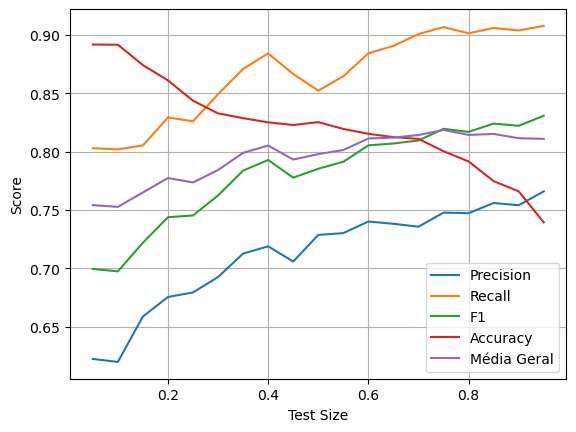

In [99]:
plt.plot(test_size, lista_precision, label='Precision')
plt.plot(test_size, lista_recall, label='Recall')
plt.plot(test_size, lista_f1, label='F1')
plt.plot(test_size, lista_acc, label='Accuracy')
plt.plot(test_size, lista_media_geral, label="Média Geral")
plt.legend()
plt.grid()
plt.xlabel('Test Size')
plt.ylabel('Score')
plt.show()